## Trabalho 1 - DGEMM 

### Grupo: Leandro Assis dos Santos e Gabriel Guimarães

#### Hardware de teste:

#### Informações CPU
CPU = AMD Ryzen 5 3500U\
Clock = 2.1 GHz\
Memória RAM = 6GB\
Versão gcc = 11.3

#### Informações GPU

Placa de vídeo = GTX 1050 Ti\
Memória de vídeo = 4GB\
Clock = 1290 MHz\
Versão CUDA toolkit = 12.1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from metrics import Resultados

In [13]:
resultadosO0 = Resultados("../dgemm-code/resultadosO0.csv")
resultadosO3 = Resultados("../dgemm-code/resultadosO3.csv")
resultadosO4 = Resultados("../dgemm-code/resultadosO4.csv")
resultadosCUDA = Resultados("../dgemm-code/resultadosCUDA.csv")

## Calculando as métricas de avaliação

### FLOPS

In [14]:
resultadosCUDA.calculaFLOPS()
resultadosO0.calculaFLOPS()
resultadosO3.calculaFLOPS()
resultadosO4.calculaFLOPS()

[[(0.12619353373646994, 0.00026237964706236655),
  (0.1308543526260349, 0.0006102131337831163),
  (0.1230887068088792, 0.0017314457379547952),
  (0.1273738467984921, 0.00017088903328960233),
  (0.1112397162851763, 0.0005117355065809084)],
 [(0.35690376018695075, 0.0005229512114125032),
  (0.3645536930675026, 0.02081183227096751),
  (0.38269002901354865, 0.0015570262685619355),
  (0.37957139582370303, 0.0011703169341868028),
  (0.3683258118064057, 0.0007990054909994362)],
 [(0.530947553247252, 0.004117276669387576),
  (0.5567165105749058, 0.002308908537474083),
  (0.5353837426209123, 0.006824315360537858),
  (0.5293521160020662, 0.003653306450594063),
  (0.5293380290024456, 0.005163303089006708)],
 [(1.9439149323675389, 0.07456349326668484),
  (1.8471745697156816, 0.46845129454240025),
  (2.055935002053859, 0.1186502599262096),
  (2.0108557437739596, 0.0932074609868621),
  (2.650165039628927, 0.10960958791974429)]]

In [49]:
# plota os gráficos de barras (uma barra por função + barra pro CUDA)
# um gráfico por flag de otimização

# gráfico de curva com barra de erros (um para cada função + CUDA) (um por otimização)
resultadosCUDA.mediaFLOPS

[[(13.640119083686182, 0.28884819866689493),
  (13.438525023938935, 0.047859503361766906),
  (13.512170998075131, 0.05777923255846932),
  (13.158722176591134, 0.0370499957227321),
  (13.17996332947273, 0.021592931865663332)]]

In [16]:
barWidth = 0.15

pos_barra = [[0, 1, 2, 3, 4]]

for _ in range(4):
    pos_barra.append([x + barWidth for x in pos_barra[-1]])

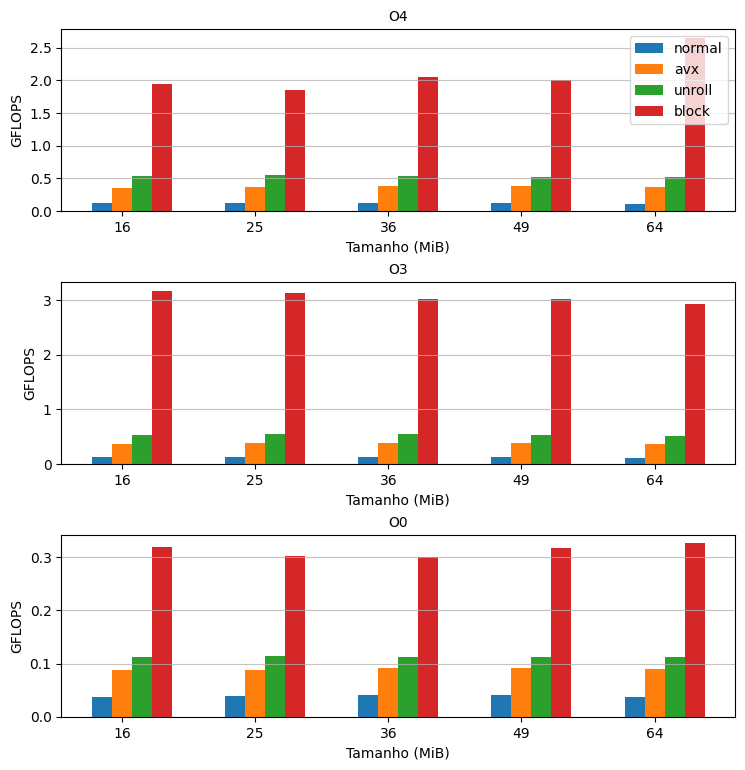

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
fig.tight_layout(pad=3.0)
plt.setp(ax, xticks=[r + barWidth for r in range(5)], xticklabels=['16', '25', '36', '49', '64'])
plt.setp(ax, ylabel='GFLOPS', xlabel='Tamanho (MiB)')

# O4
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO4.getFLOPSValues(funcao)
    
    ax[0].bar(pos_barra[idx], mediaFlops, width = barWidth, label = funcao)
    ax[0].grid(axis='y', alpha=0.75)
    ax[0].set_title("O4", fontsize=10)
    ax[0].legend()

# O3
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO3.getFLOPSValues(funcao)

    ax[1].bar(pos_barra[idx], mediaFlops, width = barWidth, label = funcao)
    ax[1].grid(axis='y', alpha=0.75)
    ax[1].set_title("O3", fontsize=10)

# O0
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO0.getFLOPSValues(funcao)

    ax[2].bar(pos_barra[idx], mediaFlops, width = barWidth, label = funcao)
    ax[2].grid(axis='y', alpha=0.75)
    ax[2].set_title("O0", fontsize=10)

# CUDA


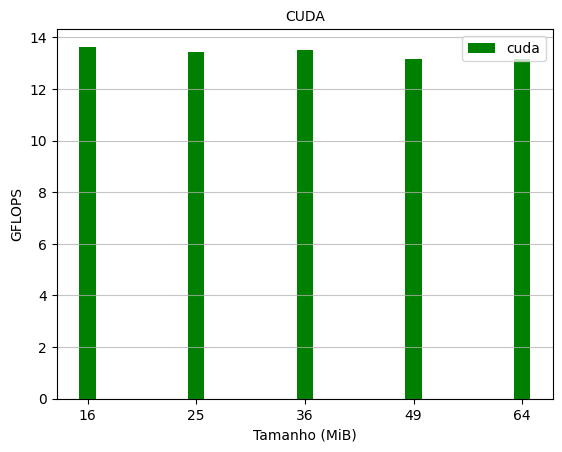

In [53]:
for idx, funcao in enumerate(["normal"]):
    mediaFlops, stdFlops = resultadosCUDA.getFLOPSValues(funcao)

    plt.bar(pos_barra[0], mediaFlops, width = barWidth, label = "cuda", color='green')
    plt.grid(axis='y', alpha=0.75)
    plt.title("CUDA", fontsize=10)
    plt.xticks(pos_barra[0], ['16', '25', '36', '49', '64'])

    plt.legend()
    plt.xlabel('Tamanho (MiB)')
    plt.ylabel('GFLOPS')

### Tempo absoluto

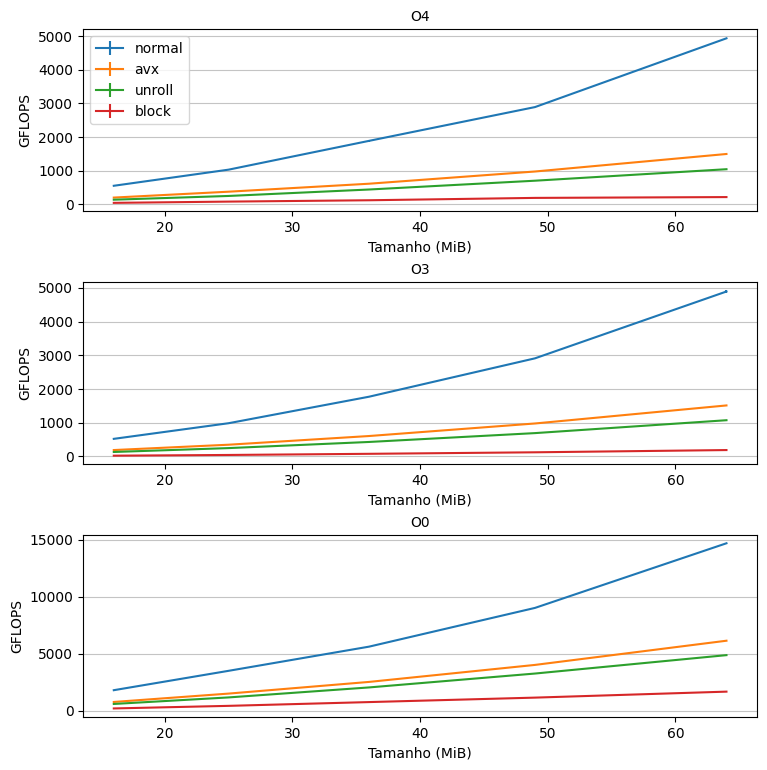

In [55]:
# plotar as curvas de tempo por tamanho para cada função + cuda
# um gráfico por flag de otimização

# objetivo: ver qual curva tem menor derivada, logo será melhor para matrizes grandes

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
fig.tight_layout(pad=3.0)
plt.setp(ax, ylabel='GFLOPS', xlabel='Tamanho (MiB)')
x = [16, 25, 36, 49, 64]

# O4
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO4.getTempoValues(funcao)
    
    ax[0].errorbar(x, mediaFlops, yerr=stdFlops, label = funcao)
    ax[0].grid(axis='y', alpha=0.75)
    ax[0].set_title("O4", fontsize=10)
    ax[0].legend()

# O3
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO3.getTempoValues(funcao)

    ax[1].errorbar(x, mediaFlops, yerr=stdFlops, label = funcao)
    ax[1].grid(axis='y', alpha=0.75)
    ax[1].set_title("O3", fontsize=10)

# O0
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO0.getTempoValues(funcao)

    ax[2].errorbar(x, mediaFlops, yerr=stdFlops, label = funcao)
    ax[2].grid(axis='y', alpha=0.75)
    ax[2].set_title("O0", fontsize=10)

### Número de instruções


Utilizando o site [Compiler Explorer](https://www.godbolt.org) para gerar o código assembly de cada uma das funções DGEMM do arquivo DGEMM.c, foi possível contar o número de instruções de cada uma das funções. Para isso, foram utilizados a versão 11.3 do gcc x86 e as flags `-mavx -lrt -Wall`, além da respectiva flag de otimização. Em seguida, foi contado o número de instruções de cada uma das funções. O resultado pode ser visto na tabela abaixo.



|Flag do compilador|Normal|Instru AVX| AVX+UNROLL|AVX+BLOCK|
|------------------|--------------------|------------------|--------------------|--------------------|
|-O0|70|90|128|203|
|-O3|44|51|63|147|
|-Ofast|81|51|63|147|